In [1]:
%load_ext autoreload

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
# import AFAI_library as afai
# import AFAI_library_torch as afai_cuda
import AFAI_parallelGPU as afai_parallel
import torch
from concurrent.futures import ThreadPoolExecutor, as_completed
# from mpl_toolkits.mplot3d import Axes3D
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [3]:
%autoreload 2

In [4]:
torch.device('cuda:0')
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"Current device: {torch.cuda.current_device()}")
print(f"Device name: {torch.cuda.get_device_name(0)}")

CUDA available: True
Current device: 0
Device name: NVIDIA GeForce RTX 3070 Ti Laptop GPU


In [5]:
period = 2
hopping1 = - np.pi/(2)
hopping2 = - 3 * np.pi/(2)
hopping3 = - 5 * np.pi/(2)
np.set_printoptions(linewidth=300)

In [6]:
model_pest = afai_parallel.tb_floquet_pbc_cuda(period, 1, hopping1, num_y=30, device='cuda:0')
model_pest2 = afai_parallel.tb_floquet_pbc_cuda(period, 1, hopping2, num_y=30, device='cuda:0')
model_pest3 = afai_parallel.tb_floquet_pbc_cuda(period, 1, hopping3, num_y=30, device='cuda:0')

In [14]:
model_afai0 = afai_parallel.tb_floquet_tbc_cuda(period, 1, hopping3, ny=6,nx=6, device='cuda:0')
model_afai1 = afai_parallel.tb_floquet_tbc_cuda(period, 1, hopping3, ny=12,nx=12, device='cuda:0')
model_afai2 = afai_parallel.tb_floquet_tbc_cuda(period, 1, hopping3, ny=20,nx=20, device='cuda:0')

Evolve one period
steps_per_segment 40000
Evolve one period
steps_per_segment 34740
Evolve one period
steps_per_segment 30172
Evolve one period
steps_per_segment 26205
Evolve one period
steps_per_segment 22759
Evolve one period
steps_per_segment 19766
Evolve one period
steps_per_segment 17167
Evolve one period
steps_per_segment 14910
Evolve one period
steps_per_segment 12949
Evolve one period
steps_per_segment 11247
Evolve one period
steps_per_segment 9768
Evolve one period
steps_per_segment 8483
Evolve one period
steps_per_segment 7368
Evolve one period
steps_per_segment 6399
Evolve one period
steps_per_segment 5557
Evolve one period
steps_per_segment 4827
Evolve one period
steps_per_segment 4192
Evolve one period
steps_per_segment 3641
Evolve one period
steps_per_segment 3162
Evolve one period
steps_per_segment 2746
Evolve one period
steps_per_segment 2385
Evolve one period
steps_per_segment 2071
Evolve one period
steps_per_segment 1799
Evolve one period
steps_per_segment 1562
Evolve

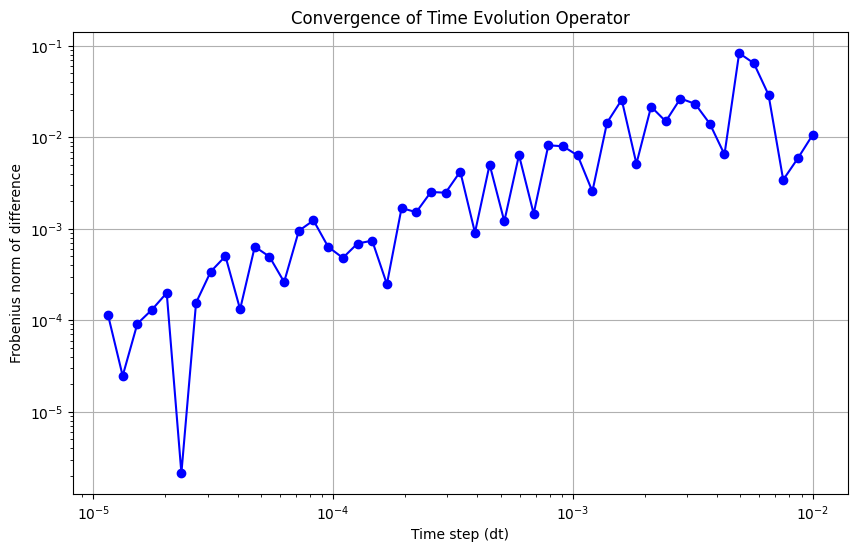

Smallest difference between consecutive dt values: 2.1324074782941364e-06


In [51]:
def convergence_test(t_final, vd, num_dt_values=50, min_dt=1e-5, max_dt=1e-2):
    # Parameters for the test
    tbc = "x"
    rotation_angle = np.pi/4
    theta_x = 0
    theta_y = 0

    # Generate a logarithmically spaced array of dt values
    dt_values = np.logspace(np.log10(min_dt), np.log10(max_dt), num_dt_values)

    # Store results
    results = []

    # Compute evolution for each dt
    for dt in dt_values:
        U = model_test.time_evol_op(t_final, dt, tbc, vd, rotation_angle, theta_x, theta_y)
        # Extract the first (and only) element if U is batched
        if U.dim() == 3:
            U = U[0]
        results.append(U.cpu().numpy())
    print(results)
    # Compute differences between consecutive results
    differences = []
    for i in range(1, len(results)):
        diff = np.linalg.norm(results[i] - results[i-1], ord='fro')
        differences.append(diff)
    print(differences)
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.loglog(dt_values[1:], differences, 'bo-')
    plt.xlabel('Time step (dt)')
    plt.ylabel('Frobenius norm of difference')
    plt.title('Convergence of Time Evolution Operator')
    plt.grid(True)
    plt.show()

    # Return the smallest difference for reference
    return min(differences)

# Usage:
# Assuming you have your model instance as 'model'
t_final = 3* period  # or any other final time you want to test
vd = 1.0  # or any other vd value you want to test
min_difference = convergence_test(t_final, vd)
print(f"Smallest difference between consecutive dt values: {min_difference}")

disorder configuration number: 0
disorder configuration number: 1
disorder configuration number: 2
disorder configuration number: 3
disorder configuration number: 4
disorder configuration number: 5
disorder configuration number: 6
disorder configuration number: 7
disorder configuration number: 8
disorder configuration number: 9
disorder configuration number: 10
disorder configuration number: 11
disorder configuration number: 12
disorder configuration number: 13
disorder configuration number: 14
disorder configuration number: 15
disorder configuration number: 16
disorder configuration number: 17
disorder configuration number: 18
disorder configuration number: 19
disorder configuration number: 20
disorder configuration number: 21
disorder configuration number: 22
disorder configuration number: 23
disorder configuration number: 24
disorder configuration number: 25
disorder configuration number: 26
disorder configuration number: 27
disorder configuration number: 28
disorder configuration n

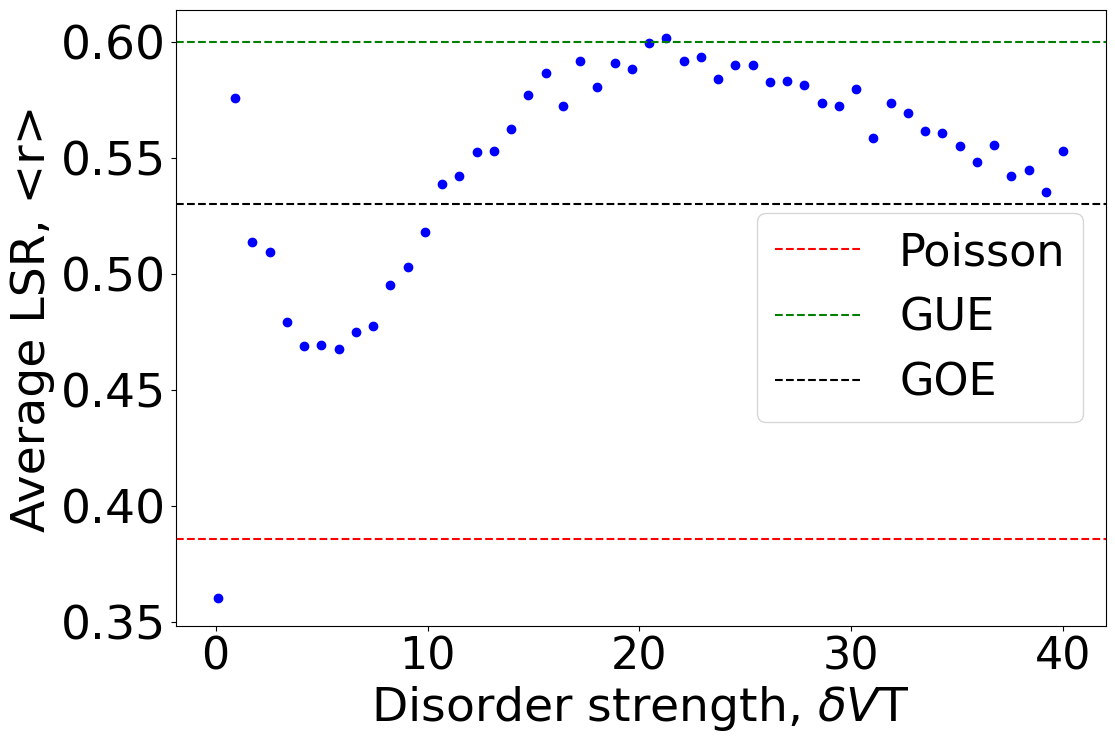

In [15]:
avg_LSR0 = model_afai0.avg_LSR_disorder_realisation(100, 0.1, 40, 50, 50)

disorder configuration number: 0
disorder configuration number: 1
disorder configuration number: 2
disorder configuration number: 3
disorder configuration number: 4
disorder configuration number: 5
disorder configuration number: 6
disorder configuration number: 7
disorder configuration number: 8
disorder configuration number: 9
disorder configuration number: 10
disorder configuration number: 11
disorder configuration number: 12
disorder configuration number: 13
disorder configuration number: 14
disorder configuration number: 15
disorder configuration number: 16
disorder configuration number: 17
disorder configuration number: 18
disorder configuration number: 19
disorder configuration number: 20
disorder configuration number: 21
disorder configuration number: 22
disorder configuration number: 23
disorder configuration number: 24
disorder configuration number: 25
disorder configuration number: 26
disorder configuration number: 27
disorder configuration number: 28
disorder configuration n

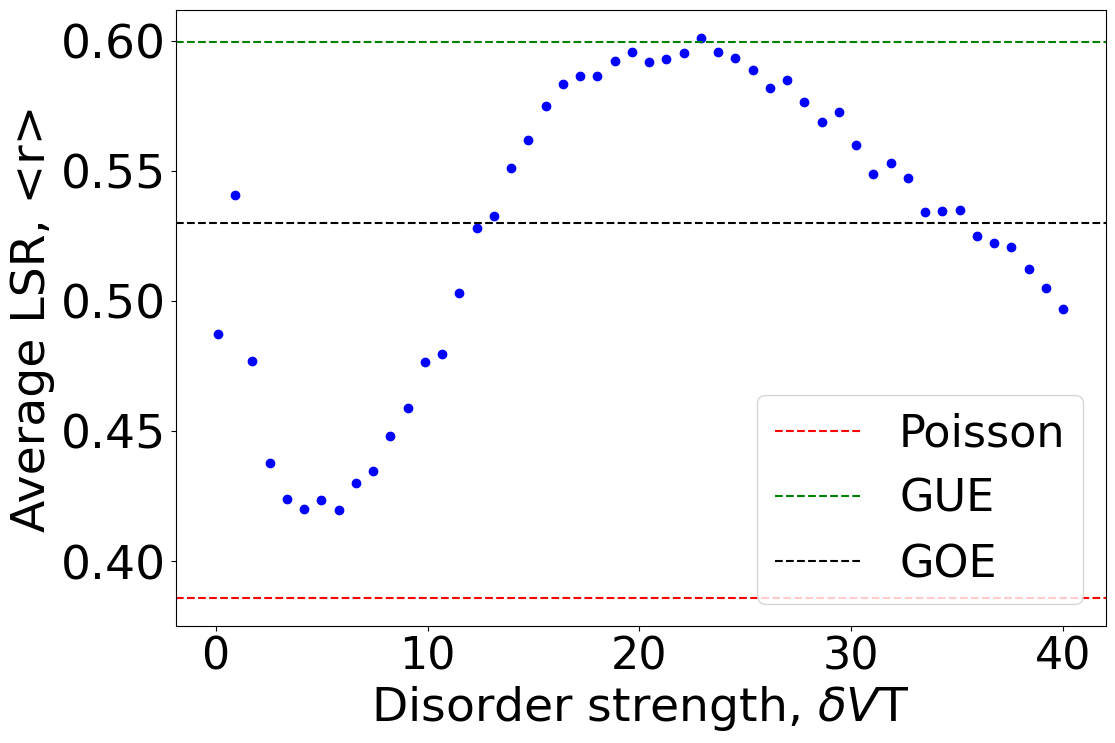

In [11]:
avg_LSR = model_afai1.avg_LSR_disorder_realisation(100, 0.1, 40, 50, 50)

In [16]:
avg_LSR2 = model_afai2.avg_LSR_disorder_realisation(100, 0.1, 40, 50, 50)

disorder configuration number: 0
